Phase 1: Data Collection and Exploratory Data Analysis (EDA)**bold text**

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Global_Pollution_Analysis.csv to Global_Pollution_Analysis.csv


Step 1 - Data Import and Preprocessing

In [3]:
# Importing necessary libraries
import pandas as pd  # For data handling
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns  # For advanced visualizations
from sklearn.preprocessing import LabelEncoder, StandardScaler  # For encoding and scaling

# Loading the dataset
df = pd.read_csv('Global_Pollution_Analysis.csv')

# Displaying the first few rows to understand structure
df.head()


,Country,Year,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),Energy_Consumption_Per_Capita (in MWh),Population (in millions),GDP_Per_Capita (in USD)
0,Hungary,2005,272.70,124.27,51.95,94802.83,158.14,5.30,41.11,37078.88,12.56,42.22,20972.96
1,Singapore,2001,86.72,60.34,117.22,56283.92,498.04,6.34,36.44,33128.20,5.23,137.25,34850.41
2,Romania,2016,91.59,83.36,121.72,56256.02,489.51,49.69,9.38,18803.46,13.15,124.47,57773.15
3,Cook Islands,2018,280.61,67.16,93.58,74864.73,145.18,8.91,18.97,9182.27,0.78,67.80,21837.51
4,Djibouti,2008,179.16,127.53,121.55,76862.06,40.38,14.93,34.00,39235.12,12.84,186.52,41379.37


Handle Missing Values

In [7]:
# Checking for missing values
df.isnull().sum()

# Handling missing values with mean/median imputation
# Example: Filling missing numeric values with median
numeric_cols = df.select_dtypes(include=np.number).columns
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())

# Handling missing categorical values
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


Data Transformation

In [8]:
# Encode categorical features like Country and Year
le = LabelEncoder()
df['Country'] = le.fit_transform(df['Country'])
df['Year'] = le.fit_transform(df['Year'])

# Normalize pollution indices using StandardScaler
scaler = StandardScaler()
pollution_cols = ['Air_Pollution_Index', 'Water_Pollution_Index', 'Soil_Pollution_Index']
df[pollution_cols] = scaler.fit_transform(df[pollution_cols])

# View transformed data
df.head()


,Country,Year,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),Energy_Consumption_Per_Capita (in MWh),Population (in millions),GDP_Per_Capita (in USD)
0,77,5,1.376167,0.193880,-0.619764,94802.83,158.14,5.30,41.11,37078.88,12.56,42.22,20972.96
1,147,1,-1.403578,-1.153098,1.028744,56283.92,498.04,6.34,36.44,33128.20,5.23,137.25,34850.41
2,136,16,-1.330788,-0.668076,1.142400,56256.02,489.51,49.69,9.38,18803.46,13.15,124.47,57773.15
3,38,18,1.494394,-1.009403,0.431675,74864.73,145.18,8.91,18.97,9182.27,0.78,67.80,21837.51
4,46,8,-0.021926,0.262567,1.138106,76862.06,40.38,14.93,34.00,39235.12,12.84,186.52,41379.37


Step 2 - Exploratory Data Analysis (EDA)

Descriptive Statistics

In [10]:
# Summary statistics for numerical features
# Print the list of columns to check for the correct names
print(df.columns)
df[['CO2_Emissions (in MT)', 'Industrial_Waste (in tons)']].describe()

Index(['Country', 'Year', 'Air_Pollution_Index', 'Water_Pollution_Index',
       'Soil_Pollution_Index', 'Industrial_Waste (in tons)',
       'Energy_Recovered (in GWh)', 'CO2_Emissions (in MT)',
       'Renewable_Energy (%)', 'Plastic_Waste_Produced (in tons)',
       'Energy_Consumption_Per_Capita (in MWh)', 'Population (in millions)',
       'GDP_Per_Capita (in USD)'],
      dtype='object')


,CO2_Emissions (in MT),Industrial_Waste (in tons)
count,200.000000,200.00000
mean,24.878100,52891.68150
std,14.470892,27224.49169
min,1.920000,1019.37000
25%,11.220000,31201.97250
50%,25.355000,55299.15000
75%,38.550000,74805.82500
max,49.690000,99739.36000


Correlation Analysis

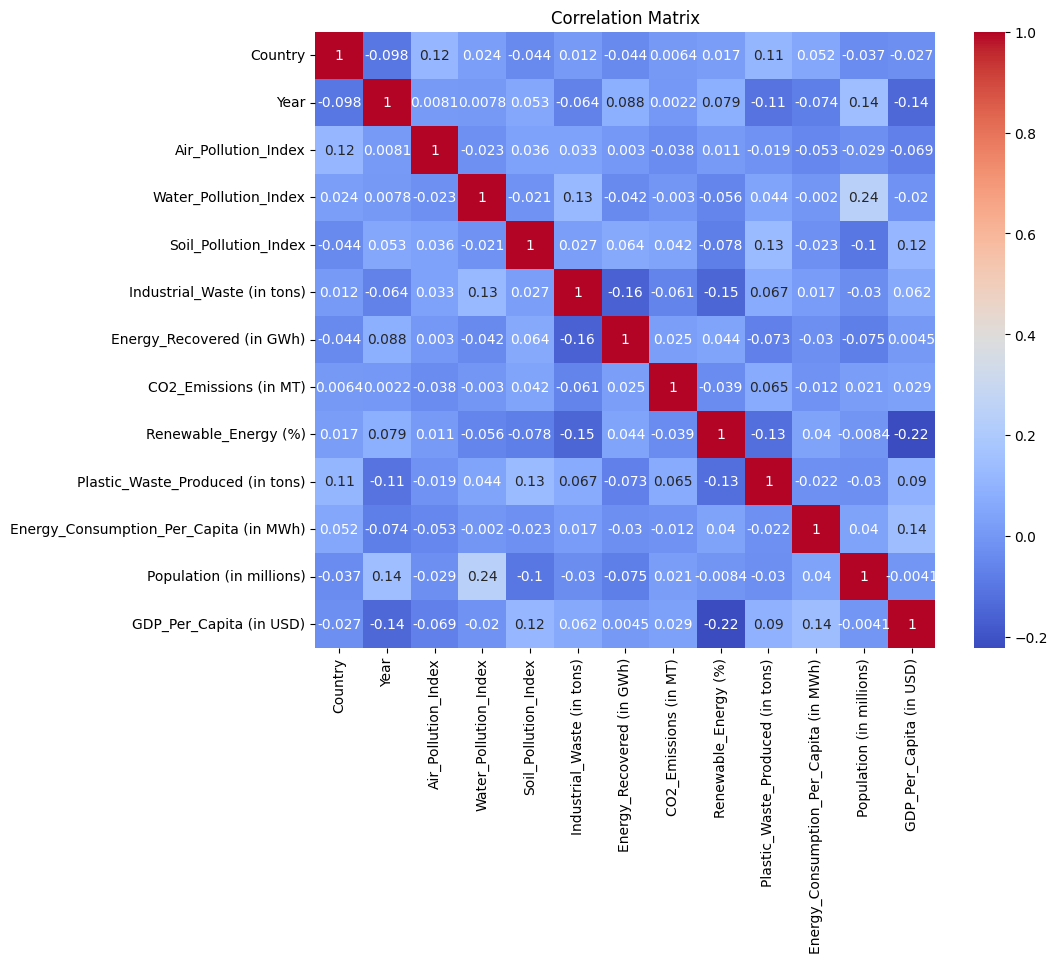

In [11]:
# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


Visualizations

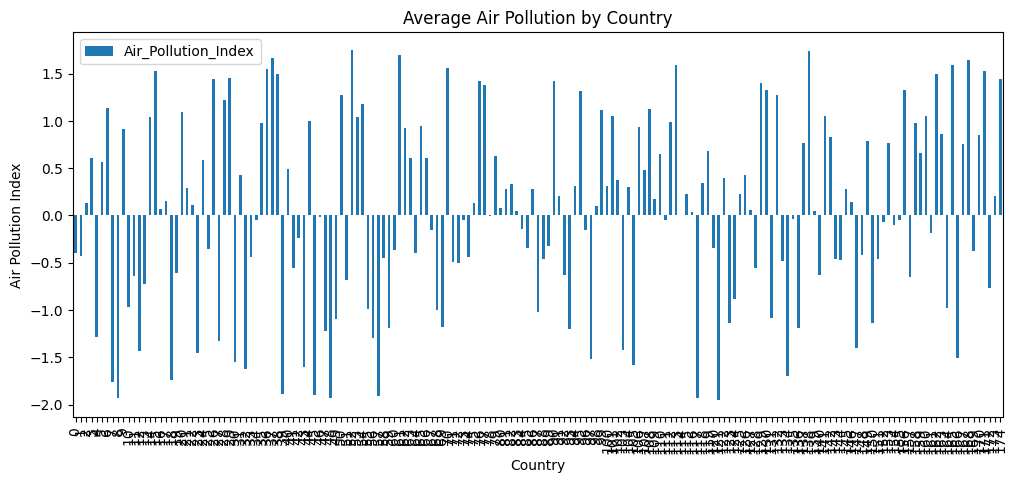

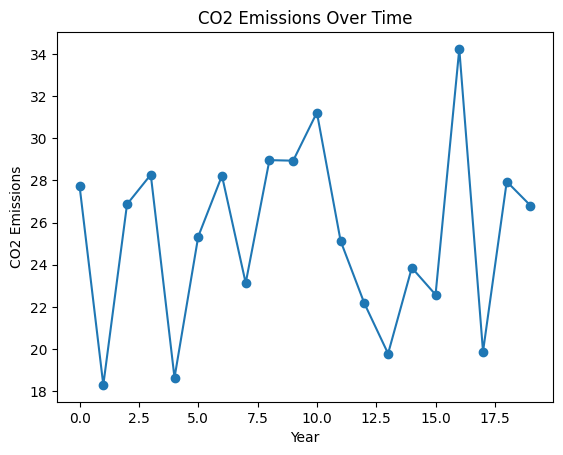

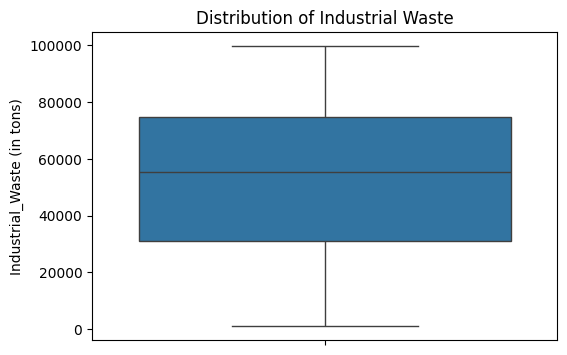

In [12]:
# Bar chart: Average pollution per country
country_avg = df.groupby('Country')[['Air_Pollution_Index']].mean()
country_avg.plot(kind='bar', figsize=(12,5), title="Average Air Pollution by Country")
plt.ylabel("Air Pollution Index")
plt.show()

# Line plot: Pollution trend over years
year_trend = df.groupby('Year')['CO2_Emissions (in MT)'].mean()
year_trend.plot(kind='line', marker='o', title="CO2 Emissions Over Time")
plt.ylabel("CO2 Emissions")
plt.show()

# Boxplot: Industrial waste distribution
plt.figure(figsize=(6,4))
sns.boxplot(df['Industrial_Waste (in tons)'])
plt.title("Distribution of Industrial Waste")
plt.show()


Step 3 - Feature Engineering

Yearly Trends

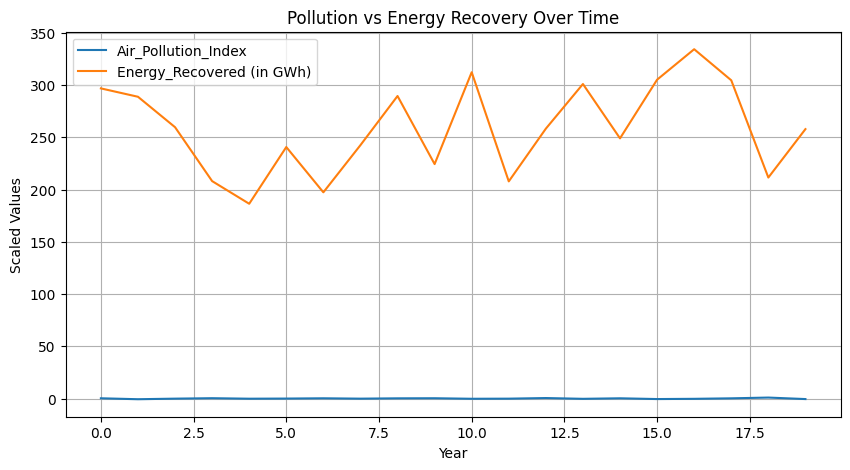

In [14]:
# Year-wise trends for pollution and energy recovery
yearly_data = df.groupby('Year')[['Air_Pollution_Index', 'Energy_Recovered (in GWh)']].mean()

# Plotting trends
yearly_data.plot(figsize=(10, 5), title="Pollution vs Energy Recovery Over Time")
plt.ylabel("Scaled Values")
plt.grid(True)
plt.show()


Energy Consumption per Capita

In [25]:
# Print all column names to identify the correct ones
print(df.columns.tolist())


['Country', 'Year', 'Air_Pollution_Index', 'Water_Pollution_Index', 'Soil_Pollution_Index', 'Industrial_Waste (in tons)', 'Energy_Recovered (in GWh)', 'CO2_Emissions (in MT)', 'Renewable_Energy (%)', 'Plastic_Waste_Produced (in tons)', 'Energy_Consumption_Per_Capita (in MWh)', 'Population (in millions)', 'GDP_Per_Capita (in USD)']


In [26]:
# Calculate total energy consumption (in MWh)
df['Total_Energy_Consumption_MWh'] = df['Energy_Consumption_Per_Capita (in MWh)'] * df['Population (in millions)']

# View the new column
df[['Energy_Consumption_Per_Capita (in MWh)', 'Population (in millions)', 'Total_Energy_Consumption_MWh']].head()


,Energy_Consumption_Per_Capita (in MWh),Population (in millions),Total_Energy_Consumption_MWh
0,12.56,42.22,530.2832
1,5.23,137.25,717.8175
2,13.15,124.47,1636.7805
3,0.78,67.80,52.8840
4,12.84,186.52,2394.9168


**Phase 2: Predictive Modeling**

Step 4 - Linear Regression Model (Predicting Energy Recovery)

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Select features and target
X = df[['Air_Pollution_Index', 'CO2_Emissions (in MT)', 'CO2_Emissions (in MT)']]
y = df['Energy_Recovered (in GWh)']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predict
y_pred = lin_reg.predict(X_test)

# Evaluation
print("Linear Regression Evaluation:")
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


Linear Regression Evaluation:
MSE: 26013.827659487048
MAE: 144.86257811225187
R² Score: -0.07574117809835523


Step 5 - Logistic Regression (Classify Pollution Level)


Define Categories

In [29]:
# Classify pollution levels based on scaled air pollution index
def label_pollution(x):
    if x < -0.5:
        return 0  # Low
    elif x < 0.5:
        return 1  # Medium
    else:
        return 2  # High

df['Pollution_Level'] = df['Air_Pollution_Index'].apply(label_pollution)


Train Logistic Regression Model

In [30]:
# Print all column names to identify the correct ones
print(df.columns.tolist())

['Country', 'Year', 'Air_Pollution_Index', 'Water_Pollution_Index', 'Soil_Pollution_Index', 'Industrial_Waste (in tons)', 'Energy_Recovered (in GWh)', 'CO2_Emissions (in MT)', 'Renewable_Energy (%)', 'Plastic_Waste_Produced (in tons)', 'Energy_Consumption_Per_Capita (in MWh)', 'Population (in millions)', 'GDP_Per_Capita (in USD)', 'Total_Energy_Consumption_MWh', 'Pollution_Level']


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Logistic Regression Evaluation:
Accuracy: 0.975
Precision: 0.9764705882352942
Recall: 0.975
F1 Score: 0.9749477533960293
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.97        15
           1       0.94      1.00      0.97        16
           2       1.00      1.00      1.00         9

    accuracy                           0.97        40
   macro avg       0.98      0.98      0.98        40
weighted avg       0.98      0.97      0.97        40



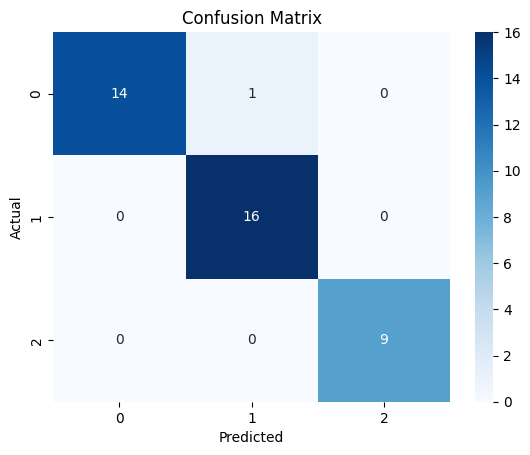

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Features and label
X_class = df[['Air_Pollution_Index', 'CO2_Emissions (in MT)']]
y_class = df['Pollution_Level']

# Split
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# Train logistic model
log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)
log_reg.fit(X_train_c, y_train_c)

# Predict
y_pred_c = log_reg.predict(X_test_c)

# Evaluation
print("Logistic Regression Evaluation:")
print("Accuracy:", accuracy_score(y_test_c, y_pred_c))
print("Precision:", precision_score(y_test_c, y_pred_c, average='weighted'))
print("Recall:", recall_score(y_test_c, y_pred_c, average='weighted'))
print("F1 Score:", f1_score(y_test_c, y_pred_c, average='weighted'))
print("Classification Report:\n", classification_report(y_test_c, y_pred_c))

# Confusion matrix
sns.heatmap(confusion_matrix(y_test_c, y_pred_c), annot=True, cmap='Blues', fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


**Phase 3: Reporting and Insights**

Step 6 - Model Evaluation and Comparison

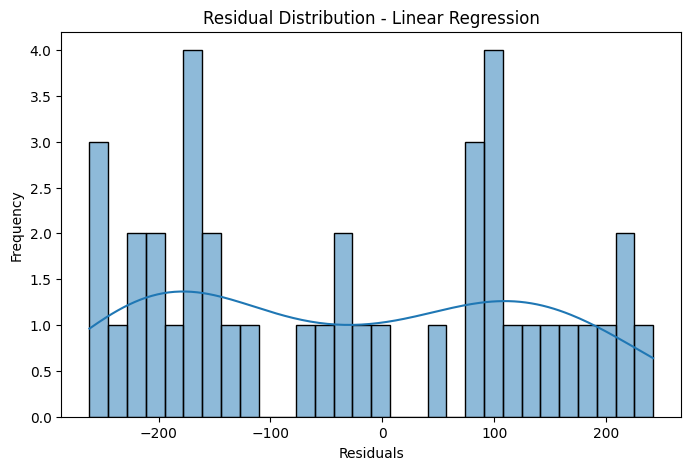

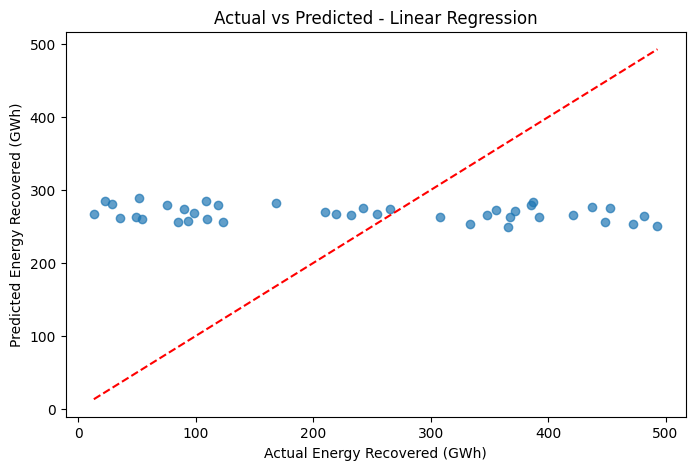

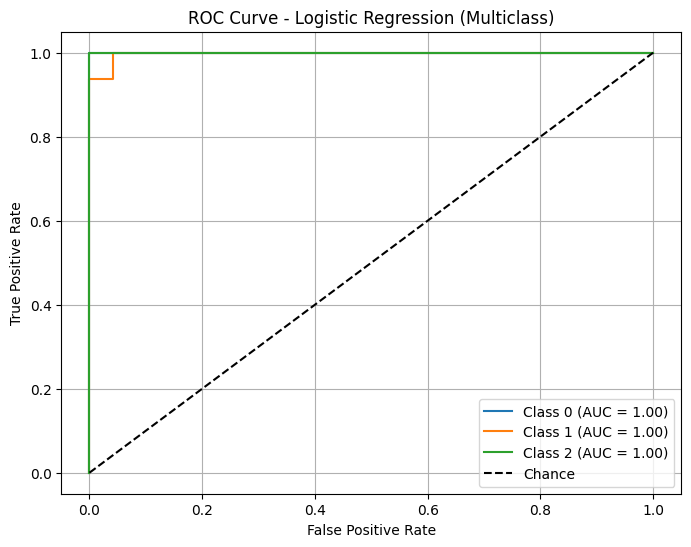

In [34]:
# --- LINEAR REGRESSION MODEL EVALUATION ---

# Residual Plot
# Changed y_pred_lr to y_pred to match the variable name used when training the linear regression model
residuals = y_test - y_pred
plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=30, kde=True)
plt.title('Residual Distribution - Linear Regression')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Actual vs Predicted Plot
# Changed y_pred_lr to y_pred
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Energy Recovered (GWh)")
plt.ylabel("Predicted Energy Recovered (GWh)")
plt.title("Actual vs Predicted - Linear Regression")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # 45-degree reference line
plt.show()

# --- LOGISTIC REGRESSION MODEL EVALUATION ---

# Confusion Matrix heatmap already created
# ROC Curve and AUC (requires one-vs-rest approach for multiclass)
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import StandardScaler

# Binarize target
# Changed y_test_cls to y_test_c and X_train_cls/y_train_cls to X_train_c/y_train_c, X_test_cls to X_test_c
y_test_bin = label_binarize(y_test_c, classes=[0, 1, 2])
y_score = OneVsRestClassifier(LogisticRegression()).fit(X_train_c, y_train_c).predict_proba(X_test_c)

# Plot ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_bin.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='Class {} (AUC = {:.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', label='Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression (Multiclass)')
plt.legend()
plt.grid()
plt.show()

Step 7 - Actionable Insights

In [35]:
# Summarizing actionable insights

print("📌 ACTIONABLE INSIGHTS:")

# Insight 1: Countries with High Pollution But Low Energy Recovery
high_pollution_low_recovery = df[(df['Air_Pollution_Index'] > 70) & (df['Energy_Recovered (in GWh)'] < df['Energy_Recovered (in GWh)'].mean())]
print("\n1. Countries with high pollution but low energy recovery (suggested for tech investments):")
print(high_pollution_low_recovery[['Country', 'Air_Pollution_Index', 'Energy_Recovered (in GWh)']].head())

# Insight 2: Renewable Energy Correlation
print("\n2. Countries with high CO2 emissions and low renewable energy usage (target for policy change):")
high_CO2_low_renewable = df[(df['CO2_Emissions (in MT)'] > df['CO2_Emissions (in MT)'].mean()) &
                            (df['Renewable_Energy (%)'] < df['Renewable_Energy (%)'].mean())]
print(high_CO2_low_renewable[['Country', 'CO2_Emissions (in MT)', 'Renewable_Energy (%)']].head())

# Insight 3: Invest in countries with potential
print("\n3. Countries with strong GDP and moderate pollution – ideal for green tech adoption:")
growth_candidates = df[(df['GDP_Per_Capita (in USD)'] > df['GDP_Per_Capita (in USD)'].mean()) &
                       (df['Air_Pollution_Index'] < 70)]
print(growth_candidates[['Country', 'GDP_Per_Capita (in USD)', 'Air_Pollution_Index']].head())

# Insight 4: Yearly trends if 'Year' column is used
# Tip: Recommend stricter regulations during years with spikes in pollution if data permits


📌 ACTIONABLE INSIGHTS:

1. Countries with high pollution but low energy recovery (suggested for tech investments):
Empty DataFrame
Columns: [Country, Air_Pollution_Index, Energy_Recovered (in GWh)]
Index: []

2. Countries with high CO2 emissions and low renewable energy usage (target for policy change):
    Country  CO2_Emissions (in MT)  Renewable_Energy (%)
2       136                  49.69                  9.38
6        37                  35.29                 26.17
8       156                  28.55                 11.47
10       99                  37.72                 16.61
16      150                  41.19                 19.61

3. Countries with strong GDP and moderate pollution – ideal for green tech adoption:
    Country  GDP_Per_Capita (in USD)  Air_Pollution_Index
2       136                 57773.15            -1.330788
4        46                 41379.37            -0.021926
6        37                 52050.07             1.669268
8       156                 55594.1